<a href="https://colab.research.google.com/github/mdondaje/SYCYF_Projekt/blob/master/Analiza_cz%C4%99stotliwo%C5%9Bciowa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analiza częstotliwościowa - projekt z przedmiotu Systemy Cyfrowe
Skład zespołu: Michał Dondajewski, Dominik Bański, Piotr Gryglewski, Adrian Grzechnik, Michał Kowalik. © 2020

In [0]:
#pobieranie bibliotek
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.signal as sig
from scipy.io import wavfile as wavfile
import librosa
import urllib
import matplotlib.pyplot as plt
# częstotliwość próbkowania
fs = 44000

In [0]:
# do zrobienia - pobieranie pliku wav z url
#url = f"http://komkowski.pl/numerki/signal.wav"

In [0]:
signal, sr = librosa.load('signal.wav', sr=fs)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


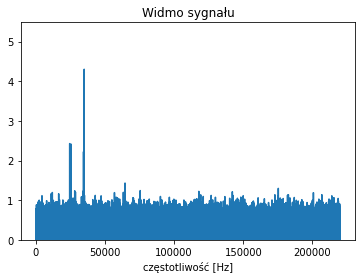

In [11]:
widmo = np.fft.rfft(signal)/1024
plt.plot(widmo)
plt.ylim(0)
plt.xlabel('częstotliwość [Hz]')
plt.title('Widmo sygnału')
plt.show()

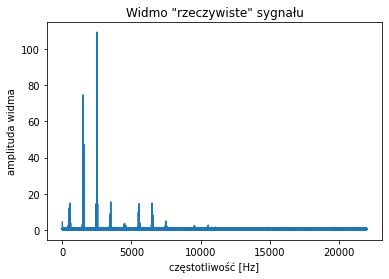

In [12]:
widmo_amp = np.abs(np.fft.rfft(signal)) / 1024
f = np.fft.rfftfreq(widmo.size*2-1, 1/fs)
plt.plot(f, widmo_amp)
plt.xlabel('częstotliwość [Hz]')
plt.ylabel('amplituda widma')
plt.title('Widmo "rzeczywiste" sygnału')
plt.show()

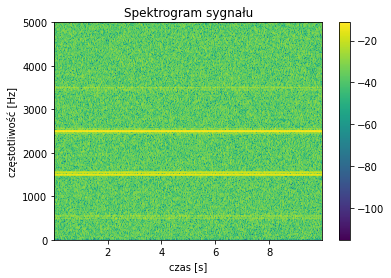

In [13]:
f, t, Sxx = sig.spectrogram(signal, fs=fs, window=np.hamming(2048), nperseg=2048,  noverlap=1536, 
                            scaling='spectrum', mode='magnitude')
plt.pcolormesh(t, f, 20 * np.log10(Sxx))
plt.xlabel('czas [s]')
plt.ylabel('częstotliwość [Hz]')
plt.title('Spektrogram sygnału')
plt.ylim(0, 5000)
plt.colorbar()
plt.show()

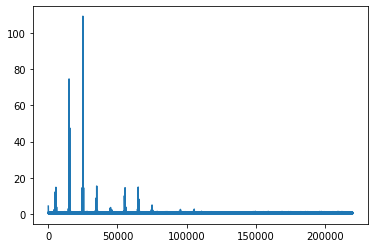

In [14]:
plt.plot(widmo_amp)

In [0]:
def maksima_widma(signal, prog=0):
  widmo_amp = np.abs(np.fft.rfft(signal)) / 1024
  ponad = np.where(widmo_amp >= prog)
  ponad=ponad[0]
  maksima = []
  for ind in ponad:
    p=ind/10
    wsp=widmo_amp[ind]/widmo_amp[0]
    maksima.append((p,wsp))
  df=pd.DataFrame(maksima, columns=['częstotliwość [Hz]','współczynnik'])
  return df.sort_values(by='współczynnik', ascending=False).head(10).reset_index(drop=True)

In [30]:
maksima_widma(signal)
  

,częstotliwość [Hz],współczynnik
0,2500.0,25.308177
1,1500.0,17.278351
2,1550.0,11.002928
3,3500.0,3.570142
4,6500.0,3.433183
5,550.0,3.406067
6,2450.0,3.356182
7,5550.0,3.351867
8,2550.0,3.341998
9,500.0,2.816711


In [17]:
"""
def maksima_widma(widmo, prog, rozmiar_okna, fs):

    ponad = (widmo >= prog).astype(np.int)
    pochodna = np.diff(ponad)
    poczatki = np.where(pochodna == 1)[0] + 1
    konce = np.where(pochodna == -1)[0] + 1
    maksima = []
    for poczatek, koniec in zip(poczatki, konce):
      p = np.argmax(widmo[poczatek:koniec]) + poczatek
      maksima.append(p * fs / rozmiar_okna)
    return maksima
  """

'\ndef maksima_widma(widmo, prog, rozmiar_okna, fs):\n\n    ponad = (widmo >= prog).astype(np.int)\n    pochodna = np.diff(ponad)\n    poczatki = np.where(pochodna == 1)[0] + 1\n    konce = np.where(pochodna == -1)[0] + 1\n    maksima = []\n    for poczatek, koniec in zip(poczatki, konce):\n      p = np.argmax(widmo[poczatek:koniec]) + poczatek\n      maksima.append(p * fs / rozmiar_okna)\n    return maksima\n  '